In [34]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json

import ot
import ot.plot

In [35]:
DIM = 2
num_measures = 5

In [36]:
import sys
import os

# Get the parent folder path (folder K)
parent_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

print(parent_folder)

# Add folder A to the Python path
folder_classes_path = os.path.join(parent_folder, 'classes')
sys.path.append(folder_classes_path)

from input_generate_entropy import *
from true_WB import *

/Users/zeyichen/GitHub/Repo/WB_Algo/Exp1_WBverify


In [37]:
source_sampler = MixtureOfGaussians(DIM)
source_sampler.random_components(5)
source_sampler.set_truncation(100)
entropic_sampler = entropic_input_sampler(dim = DIM, num_measures = num_measures, tilde_K = 4, source_sampler = source_sampler, n_k = 10)

entropic_sampler.construct_surjective_mapping()
entropic_sampler.generate_strong_convexity_param()
entropic_sampler.generate_g_vectors()
entropic_sampler.generate_Y_matrices()
entropic_sampler.compute_theta()

In [38]:
# Path to G_samples.json
g_samples_path = os.path.join(parent_folder, "Notebooks", "NN_save", "G_samples", "G_samples.json")

# Read the JSON file
with open(g_samples_path, "r") as f:
    g_samples_dict = json.load(f)


In [39]:
print(len(g_samples_dict))

55


In [40]:
G_samples = g_samples_dict['iteration_16500']
WB_samples = source_sampler.sample(5000)
WB_approximate_samples = np.array(G_samples)

M = ot.dist(WB_samples, WB_approximate_samples)
a, b = np.ones((WB_samples.shape[0],)) / WB_samples.shape[0], np.ones((WB_approximate_samples.shape[0],)) / WB_approximate_samples.shape[0]
W2_sq = ot.emd2(a, b, M, numItermax=1e6)

print(f"Wasserstein distance between true and approximated Wasserstein barycenter: {W2_sq}")


Wasserstein distance between true and approximated Wasserstein barycenter: 63.776462488570445


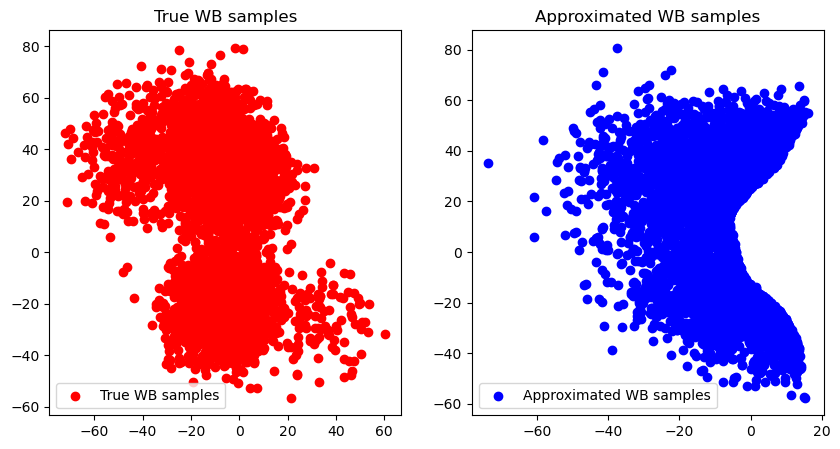

In [41]:
# plot WB_samples and WB_approximate_samples together 
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.scatter(WB_samples[:, 0], WB_samples[:, 1], c='r', label='True WB samples')
ax.set_title("True WB samples")
ax.legend()

ax = fig.add_subplot(122)
ax.scatter(WB_approximate_samples[:, 0], WB_approximate_samples[:, 1], c='b', label='Approximated WB samples')
ax.set_title("Approximated WB samples")
ax.legend()

plt.show()
plt.close(fig)

In [21]:
g_samples_path_entropic = os.path.join(parent_folder, "Notebooks", "entropic_with_epsilon_10", "G_samples", "G_samples.json")

# Read the JSON file
with open(g_samples_path_entropic, "r") as f:
    g_samples_dict_entropic = json.load(f)

In [22]:
print(len(g_samples_dict_entropic))

20


In [23]:
G_samples = g_samples_dict_entropic['iteration_18']
WB_samples = source_sampler.sample(5000)
WB_approximate_samples = np.array(G_samples)

M = ot.dist(WB_samples, WB_approximate_samples)
a, b = np.ones((WB_samples.shape[0],)) / WB_samples.shape[0], np.ones((WB_approximate_samples.shape[0],)) / WB_approximate_samples.shape[0]
W2_sq = ot.emd2(a, b, M, numItermax=1e6)

print(f"Wasserstein distance between true and approximated Wasserstein barycenter: {W2_sq}")

Wasserstein distance between true and approximated Wasserstein barycenter: 4.998761253544895


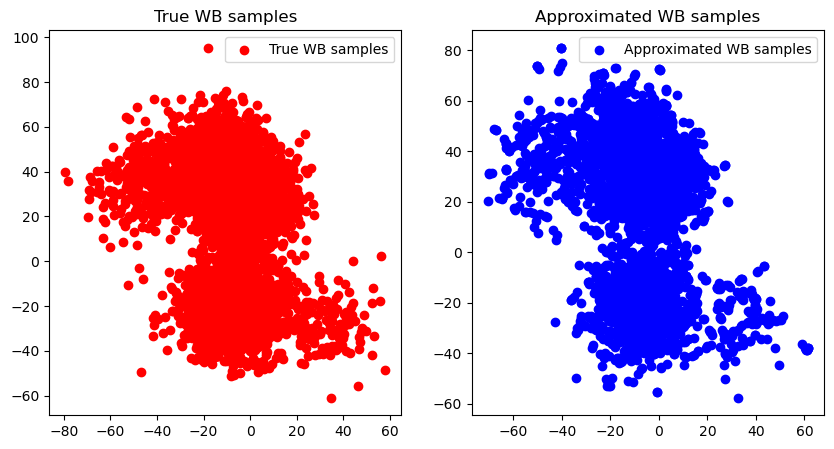

In [24]:
# plot WB_samples and WB_approximate_samples together 
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.scatter(WB_samples[:, 0], WB_samples[:, 1], c='r', label='True WB samples')
ax.set_title("True WB samples")
ax.legend()

ax = fig.add_subplot(122)
ax.scatter(WB_approximate_samples[:, 0], WB_approximate_samples[:, 1], c='b', label='Approximated WB samples')
ax.set_title("Approximated WB samples")
ax.legend()

plt.show()
plt.close(fig)